In [ ]:
ls

In [ ]:
import sqlite3
import tpclean.tpclean as tp

In [ ]:
tp.sql_connect("database.sqlite")

In [ ]:
tables_df = tp.sql("SELECT * FROM sqlite_master")

In [ ]:
tables_df

In [ ]:
tables_df.tbl_name

In [ ]:
df_list=[]
for name in tables_df.tbl_name:
    df_list.append(tp.sql(f"""SELECT * FROM {name} """))
    

### df_list[1] and df_list[2] are acutally the same

In [ ]:
d1_d2_df = df_list[1].loc[( (df_list[1].Div == 'D2') | (df_list[1].Div == 'D1') ) & (df_list[1].Season == 2011)]
d1_d2_df.shape

In [ ]:
df_list[3].head()
#contains no further information

In [ ]:
df_list[4].head()
#additional non relevant info for the teams

In [ ]:
df_list[5].head()
# overview of Team-Ids

In [ ]:
df_list[6].head()
#usable overview

In [ ]:
df_list[7].head()
#like nummer 6 with more irrelevant information

In [ ]:
df_list[8].head()
#irrelevant

Name
Sum of Wins
Sum of Losses
Percentage
Year
Home Stadium
Num of Games Played
Goal Counter


In [ ]:
ls

In [ ]:
Season_2011.data.count()

In [ ]:
df3 = tp.sql("""SELECT * FROM FlatView_Advanced WHERE div in ("D1","D2") AND Season = 2011""")

In [ ]:
len(df3)

In [ ]:
df3.drop_duplicates("Match_ID").groupby("Match_ID").count().head()

In [ ]:
df3.groupby("Match_ID").count().head()

In [2]:
import Seasons

In [3]:
Season_2011 = Seasons.Season(2011, ["D1","D2"])

Connection to database.sqlite successfull. with curser <sqlite3.Cursor object at 0x1a17874c00>


In [ ]:
len(Season_2011.data)

In [ ]:
Season_2011.data = Season_2011.data.drop_duplicates("Match_ID")

In [ ]:
for game in Season_2011.games_list:
    print(game.__dict__)

In [ ]:
def tie(self):
    if self.score_away == self.score_home:
        return [self.home_team, self.away_team]
    else:
        return None

In [ ]:
Season_2011.teams_list[0].__dict__

In [ ]:
tie(Season_2011.games_list[7])

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def plot(self):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(5,6))
    x = [1,2,3]
    y = [self.win_counter,self.loss_counter,self.tie_counter]
    plt.bar(x,y, tick_label = ["Win","Loss","Tie"], color = ("g","r","y"))
    
    plt.ylim((0,34))
    plt.title(f"{self.name}- game results")
    plt.ylabel("percentage (%)")

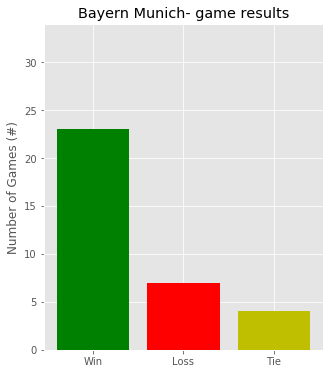

In [4]:
Season_2011.teams_list[0].plot()